In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
def integrate_wrt_cdf(F, f, limits, bins):
    """
    :param F: cdf
    :param f: function to integrate w.r.t dF measure
    :param limits: tuple of integration bounds. It is assumed that F is undefined at the limit points
    :param bins: number of points on x-grid to use in integration (so, not quite the number of bins)
    """
    bin_width = (limits[1] - limits[0]) / bins  # just approximate, not the real bin width
    grid_points = np.linspace(limits[0] + bin_width/4, limits[1], num=bins, endpoint=False)
    cdf = F(grid_points)
    measure = np.diff(cdf)
    func = f(grid_points)
    return np.dot(measure, func[:-1])

In [3]:
def alpha(x, h):
    return np.log(((1-h)*np.exp(x) - h)/(1-h*(1+np.exp(x))))
def FF(x, h, T, d, sigma):
    return sp.norm.cdf((alpha(x, h) - T*d)/(sigma * np.sqrt(T)))
def ff(tau, dprime, x, sigma):
    return sp.norm.cdf(-(tau*dprime+x) / (np.sqrt(tau)*sigma))
def acc_perfect_accum(d, sigma, t):
    return sp.norm.cdf(np.abs(d)/sigma * np.sqrt(t))

In [14]:
h=.49
T = .2
tau=.2
d=1
dprime=1
sigma=1
t = np.concatenate([np.arange(.05, .201, step=.05),np.arange(.202,.251,step=.001), np.arange(.252,.41,step=.05)])
num_bins = 10000
a = np.log(h / (1-h))
int_lims = (min(a, -a), max(a, -a))
def FFF(x):
    return FF(x, h, T, d, sigma)

acc = []
for tt in t:
    if tt <= T:
        acc.append(acc_perfect_accum(d, sigma, tt))
    else:
        tau = tt - T
        def fff(x):
            return ff(tau, dprime, x, sigma)
        pneg = integrate_wrt_cdf(FFF, fff, int_lims, num_bins)
        if d > 0 and dprime > 0:
            acc.append(1-pneg)
        elif d > 0 and dprime < 0:
            acc.append(pneg)
        else:
            raise ValueError("no negative drift in first epoch allowed for now")

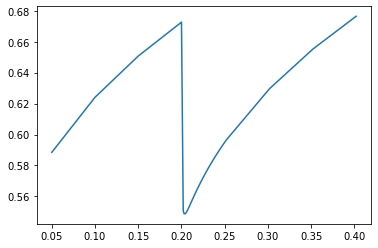

In [15]:
plt.plot(t, acc)